#Data preprocess and model implementation for the **Wine dataset**.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.figure import backend_bases

# **Task 1: Acquire, preprocess, and analyze the data**

## 1. Loading the dataset

In [ ]:
# load wine dataset
wine = pd.read_csv('https://archive.ics.uci.edu/static/public/109/data.csv')
wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## 2. Cleaning the data

In [ ]:
wine.isin(['?']).sum(axis=0)

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

Although we can see there is no missing value in the wine dataset, we still include the following cleaning step just as a part of standard workflow.

In [ ]:
# clean the wine dataset
clean_wine = wine[~wine.eq('?').any(1)]
wine.isin(['?']).sum(axis=0)

<ipython-input-4-f59ede07ccd4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  clean_wine = wine[~wine.eq('?').any(1)]


Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

## 3. Computing Basic Statistics

In [ ]:
wine.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
wine["class"].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

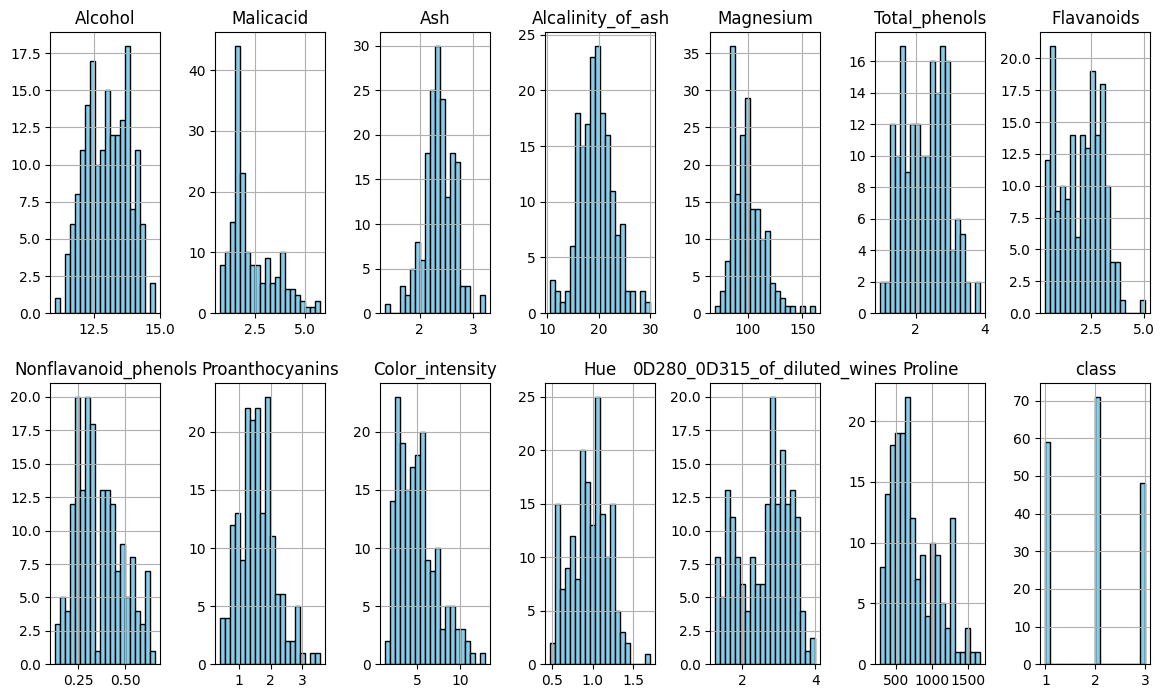

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(10, 8), gridspec_kw={'hspace': 0.25, 'wspace': 0.5})

# Adjusting the layout parameters
wine.hist(ax=axes, bins=20, color='skyblue', edgecolor='black')

# Adjusting figure layout
plt.subplots_adjust(top=0.9, left=0, right=1.1)

# Show the plot
plt.show()

Here we've had some basic insight on the wine dataset, including some basic statistical analysis and visualizations.

# **Task 2: Implement the models**

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.classes = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, Y):
        num_samples, num_features = X.shape
        self.classes = np.unique(Y)
        num_classes = len(self.classes)
        self.weights = np.zeros((num_features, num_classes))

        for epoch in range(self.num_epochs):
            # Forward pass
            scores = np.dot(X, self.weights)
            probabilities = self.softmax(scores)

            # Compute gradients
            indicator = (Y.reshape(-1, 1) == np.arange(1, num_classes + 1))
            dz = probabilities - indicator
            dw = np.dot(X.T, dz) / num_samples

            # Update parameters
            self.weights -= self.learning_rate * dw

    def predict(self, X):
        scores = np.dot(X, self.weights)
        probabilities = self.softmax(scores)
        # Shift index to match class labels (1, 2, 3)
        predictions = np.argmax(probabilities, axis=1) + 1
        return predictions

In [ ]:
class MiniBatchLogisticRegression(LogisticRegression):
    def __init__(self, learning_rate=0.01, num_epochs=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = None
        self.classes = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, Y):
        num_samples, num_features = X.shape
        self.classes = np.unique(Y)
        num_classes = len(self.classes)
        self.weights = np.zeros((num_features, num_classes))

        for epoch in range(self.num_epochs):
            # Shuffle the data
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]

            # Mini-batch training
            for i in range(0, num_samples, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                Y_batch = Y_shuffled[i:i + self.batch_size]

                # Forward pass
                scores = np.dot(X_batch, self.weights)
                probabilities = self.softmax(scores)

                # Compute gradients
                indicator = (Y_batch.reshape(-1, 1) == np.arange(1, num_classes + 1))
                dz = probabilities - indicator
                dw = np.dot(X_batch.T, dz) / self.batch_size

                # Update parameters
                self.weights -= self.learning_rate * dw

    def predict(self, X):
        scores = np.dot(X, self.weights)
        probabilities = self.softmax(scores)

        # Shift index to match class labels (1, 2, 3)
        predictions = np.argmax(probabilities, axis=1) + 1
        return predictions

In [ ]:
# Extract features and target
X = wine.drop('class', axis=1).values
y = wine['class'].values

In [ ]:
base_regr = LogisticRegression()
base_regr.fit(X, y)

In [ ]:
print("The weights are: \n", base_regr.weights)
print("\n")

The weights are: 
 [[ -4.15494566   2.65091434   1.50403132]
 [ -1.2392976   -1.23689932   2.47619692]
 [ -0.76627279   0.4190022    0.34727059]
 [-11.04748556   6.38521088   4.66227469]
 [-24.14618311  18.10355757   6.04262554]
 [ -0.06079502   1.2403941   -1.17959908]
 [  0.78956087   1.82485045  -2.61441132]
 [ -0.261843     0.0629644    0.1988786 ]
 [ -0.10736607   1.00578785  -0.89842178]
 [ -2.08527163  -4.65190448   6.73717611]
 [ -0.20715175   0.81320899  -0.60605723]
 [ -0.05804638   2.0690896   -2.01104323]
 [  4.1486362   -1.33442503  -2.81421117]]




In [ ]:
base_minibatch_regr = MiniBatchLogisticRegression()
base_minibatch_regr.fit(X, y)

In [ ]:
print("The weights are: \n", base_minibatch_regr.weights)
print("\n")

The weights are: 
 [[-9.16880185e+00  4.79661604e+00  4.37218581e+00]
 [-3.12729842e+00 -8.86646292e+00  1.19937613e+01]
 [-1.56554594e+00  4.13436384e-01  1.15210956e+00]
 [-3.27147324e+01  1.57935671e+01  1.69211653e+01]
 [-2.68077942e+01  1.97664207e+01  7.04137348e+00]
 [ 1.20200819e+00  5.29458094e+00 -6.49658913e+00]
 [ 4.67878886e+00  8.89281134e+00 -1.35716002e+01]
 [-8.42091935e-01 -9.29310160e-03  8.51385037e-01]
 [ 6.77149215e-01  4.32887597e+00 -5.00602518e+00]
 [-6.25164747e+00 -2.72836764e+01  3.35353238e+01]
 [-2.78559757e-01  3.62648852e+00 -3.34792876e+00]
 [ 1.60558561e+00  9.38540672e+00 -1.09909923e+01]
 [ 4.68289470e+00 -3.62491102e+00 -1.05798368e+00]]




# **Task 3: Run Experiments**

### The calculate_metrics function to calculate metrics will be used:

In [ ]:
def calculate_metrics(y_true, y_pred):
    # Convert class labels to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Get unique class labels
    unique_labels = np.unique(np.concatenate([y_true, y_pred]))

    # Initialize metrics
    accuracy = 0.0
    precision = np.zeros(len(unique_labels))
    recall = np.zeros(len(unique_labels))
    f1_score = np.zeros(len(unique_labels))

    for label in unique_labels:
        # True positives
        tp = np.sum((y_true == label) & (y_pred == label))

        # False positives
        fp = np.sum((y_true != label) & (y_pred == label))

        # False negatives
        fn = np.sum((y_true == label) & (y_pred != label))

        # True negatives
        tn = np.sum((y_true != label) & (y_pred != label))

        # Calculate metrics
        accuracy += (tp + tn) / len(y_true)
        precision[label-1] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[label-1] = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score[label-1] = 2 * (precision[label-1] * recall[label-1]) / (precision[label-1] + recall[label-1]) if (precision[label-1] + recall[label-1]) > 0 else 0

    # Average accuracy and metrics over all classes
    accuracy /= len(unique_labels)
    precision_avg = np.mean(precision)
    recall_avg = np.mean(recall)
    f1_score_avg = np.mean(f1_score)

    return {
        'accuracy': accuracy,
        'precision': precision_avg,
        'recall': recall_avg,
        'f1_score': f1_score_avg
    }

## 1. Perform an 80/20 train/test split and report the performance metrics on both the training set and test set for each model.

In [ ]:
X = wine.drop('class', axis=1).values
y = wine['class'].values

np.random.seed(40)

# shuffle the indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# calculate the split point for 80/20 ratio
split_point = int(0.8 * len(X))

# Split the data
X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
y_train, y_test = y[indices[:split_point]], y[indices[split_point:]]

In [ ]:
# train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

train_predictions = log_reg.predict(X_train)
test_predictions = log_reg.predict(X_test)

In [ ]:
# calculate metrics for logistic regression
base_train_metrics = calculate_metrics(y_train, train_predictions)
base_test_metrics = calculate_metrics(y_test, test_predictions)

print("Logistic Regression Metrics:\n")
print("Metrics on train dataset:\n")
print(f"Accuracy: {base_train_metrics['accuracy']}")
print(f"Precision: {base_train_metrics['precision']}")
print(f"Recall: {base_train_metrics['recall']}")
print(f"F1 Score: {base_train_metrics['f1_score']}")
print("---------------------------\n")
print("Metrics on test dataset:\n")
print(f"Accuracy: {base_test_metrics['accuracy']}")
print(f"Precision: {base_test_metrics['precision']}")
print(f"Recall: {base_test_metrics['recall']}")
print(f"F1 Score: {base_test_metrics['f1_score']}")

Logistic Regression Metrics:

Metrics on train dataset:

Accuracy: 0.6995305164319249
Precision: 0.6776025671312702
Recall: 0.6020147820826428
F1 Score: 0.5164200581257751
---------------------------

Metrics on test dataset:

Accuracy: 0.7407407407407408
Precision: 0.7169590643274854
Recall: 0.6179487179487179
F1 Score: 0.5463888888888889


In [ ]:
# train logistic regression
base_minibatch_reg = MiniBatchLogisticRegression()
base_minibatch_reg.fit(X_train, y_train)

train_predictions = base_minibatch_reg.predict(X_train)
test_predictions = base_minibatch_reg.predict(X_test)

In [ ]:
# calculate metrics for logistic regression
base_train_metrics = calculate_metrics(y_train, train_predictions)
base_test_metrics = calculate_metrics(y_test, test_predictions)

print("Mini-Batch SGD Metrics:\n")
print("Metrics on train dataset:\n")
print(f"Accuracy: {base_train_metrics['accuracy']}")
print(f"Precision: {base_train_metrics['precision']}")
print(f"Recall: {base_train_metrics['recall']}")
print(f"F1 Score: {base_train_metrics['f1_score']}")
print("---------------------------\n")
print("Metrics on test dataset:\n")
print(f"Accuracy: {base_test_metrics['accuracy']}")
print(f"Precision: {base_test_metrics['precision']}")
print(f"Recall: {base_test_metrics['recall']}")
print(f"F1 Score: {base_test_metrics['f1_score']}")

Mini-Batch SGD Metrics:

Metrics on train dataset:

Accuracy: 0.755868544600939
Precision: 0.4224960254372019
Recall: 0.5817091454272864
F1 Score: 0.4888357256778309
---------------------------

Metrics on test dataset:

Accuracy: 0.7222222222222222
Precision: 0.40277777777777773
Recall: 0.5384615384615384
F1 Score: 0.4475675675675676


## 2. Use a 5-fold cross-validation technique and report the performance metrics on both the training set and test set for each model.##

In [ ]:
X = wine.drop('class', axis=1).values
y = wine['class'].values

np.random.seed(40)

# shuffle the indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# shuffle the data
X = X[indices]
y = y[indices]

In [ ]:
fold_size = len(X)//5

fold_metrics_list = []

# perform k-fold cross-validation for Logistic Regression
log_reg = LogisticRegression()

for i in range(5):
    start, end = i * fold_size, (i + 1) * fold_size
    X_test_fold, y_test_fold = X[start:end], y[start:end]
    X_train_fold, y_train_fold = np.concatenate([X[:start], X[end:]]), np.concatenate([y[:start], y[end:]])

    # train the model
    log_reg.fit(X_train_fold, y_train_fold)

    # make predictions on both sets
    log_train_prediction = log_reg.predict(X_train_fold)
    log_test_prediction = log_reg.predict(X_test_fold)

    # calculate metrics
    fold_train_metrics = calculate_metrics(y_train_fold, log_train_prediction)
    fold_test_metrics = calculate_metrics(y_test_fold, log_test_prediction)

    fold_metrics_list.append({
        'fold': i + 1,
        'train_accuracy': fold_train_metrics['accuracy'],
        'train_precision': fold_train_metrics['precision'],
        'train_recall': fold_train_metrics['recall'],
        'train_f1_score': fold_train_metrics['f1_score'],
        'test_accuracy': fold_test_metrics['accuracy'],
        'test_precision': fold_test_metrics['precision'],
        'test_recall': fold_test_metrics['recall'],
        'test_f1_score': fold_test_metrics['f1_score']})

metrics_3_2 = pd.DataFrame(fold_metrics_list)

In [ ]:
# print the results
print("Logistic Regression Cross-Validation Metrics:")
print(metrics_3_2)

Logistic Regression Cross-Validation Metrics:
   fold  train_accuracy  train_precision  train_recall  train_f1_score  \
0     1        0.776224         0.484574      0.586170        0.518981   
1     2        0.794872         0.758256      0.709659        0.678281   
2     3        0.748252         0.747755      0.675255        0.602462   
3     4        0.776224         0.473658      0.595656        0.519710   
4     5        0.724942         0.772564      0.643562        0.548452   

   test_accuracy  test_precision  test_recall  test_f1_score  
0       0.771429        0.492754     0.666667       0.549020  
1       0.733333        0.634632     0.623810       0.600547  
2       0.676190        0.414141     0.571429       0.433333  
3       0.771429        0.512821     0.633333       0.549123  
4       0.752381        0.755735     0.673280       0.601457  


## 3. Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training data affects the performance for both models. Plot two curves as a function of training size, one for performance in train and one for test.

In [ ]:
X = wine.drop('class', axis=1).values
y = wine['class'].values

np.random.seed(40)

# shuffle the indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# calculate the split point for 80/20 ratio
split_point = int(0.8 * len(X))

# Split the data
X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
y_train, y_test = y[indices[:split_point]], y[indices[split_point:]]

In [ ]:
dataset_metrics_list = []

# create models
log_reg = LogisticRegression()

# evaluate with growing data for logistic regression
for train_size in np.arange(0.2, 0.91, 0.05):
    split_index = int(train_size * len(X))
    X_train_i = X_train[:split_index]
    y_train_i = y_train[:split_index]

    # train the model
    log_reg.fit(X_train_i, y_train_i)

    # make predictions on both training and test sets
    dataset_train_prediction = log_reg.predict(X_train_i)
    dataset_test_prediction = log_reg.predict(X_test)

    # calculate metrics
    dataset_train_metrics = calculate_metrics(y_train_i, dataset_train_prediction)
    dataset_test_metrics = calculate_metrics(y_test, dataset_test_prediction)

    dataset_metrics_list.append({
        'train_data_size': str(round(train_size*100))+"%",
        'train_accuracy': dataset_train_metrics['accuracy'],
        'train_precision': dataset_train_metrics['precision'],
        'train_recall': dataset_train_metrics['recall'],
        'train_f1_score': dataset_train_metrics['f1_score'],
        'test_accuracy': dataset_test_metrics['accuracy'],
        'test_precision': dataset_test_metrics['precision'],
        'test_recall': dataset_test_metrics['recall'],
        'test_f1_score': dataset_test_metrics['f1_score']})

metrics_3_3 = pd.DataFrame(dataset_metrics_list)

In [ ]:
print("The value of train_data_size represents the percentage of training set, which has been splitted by 80/20 train/test.\n")
print(metrics_3_3)

The value of train_data_size represents the percentage of training set, which has been splitted by 80/20 train/test.

   train_data_size  train_accuracy  train_precision  train_recall  \
0              20%        0.771429         0.500000      0.638889   
1              25%        0.742424         0.504762      0.583333   
2              30%        0.735849         0.453829      0.626901   
3              35%        0.720430         0.787683      0.643938   
4              40%        0.784038         0.469231      0.614693   
5              45%        0.808333         0.520000      0.629630   
6              50%        0.803030         0.517709      0.632184   
7              55%        0.786942         0.519048      0.606061   
8              60%        0.773585         0.479303      0.595238   
9              65%        0.704348         0.649709      0.579047   
10             70%        0.715054         0.694024      0.616162   
11             75%        0.704261         0.403323   

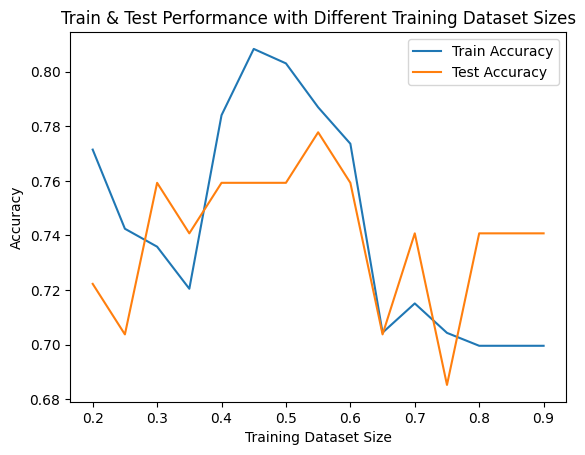

In [ ]:
# plot the results
plt.plot(np.arange(0.2, 0.91, 0.05), metrics_3_3["train_accuracy"], linestyle='-', label='Train Accuracy')
plt.plot(np.arange(0.2, 0.91, 0.05), metrics_3_3["test_accuracy"], linestyle='-', label='Test Accuracy')

plt.title('Train & Test Performance with Different Training Dataset Sizes')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 4. Try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the convergence speed and final performance of different batch sizes to the fully batched baseline.

In [ ]:
X = wine.drop('class', axis=1).values
y = wine['class'].values

np.random.seed(40)

# shuffle the indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# calculate the split point for 80/20 ratio
split_point = int(0.8 * len(X))

# Split the data
X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
y_train, y_test = y[indices[:split_point]], y[indices[split_point:]]

In [ ]:
batch_metrics_list = []

# train and evaluate with growing mini-batch sizes
batch_sizes=[8, 16, 32, 64, 128]

for i in range(len(batch_sizes)):
    # create a new instance of the model for each batch size
    mini_batch_log_reg = MiniBatchLogisticRegression(batch_size=batch_sizes[i])

    # train the model
    mini_batch_log_reg.fit(X_train, y_train)

    # make predictions on both training and test sets
    batch_train_prediction = mini_batch_log_reg.predict(X_train)
    batch_test_prediction = mini_batch_log_reg.predict(X_test)

    # calculate metrics
    batch_train_metrics = calculate_metrics(y_train, batch_train_prediction)
    batch_test_metrics = calculate_metrics(y_test, batch_test_prediction)

    batch_metrics_list.append({
        'batch_size': batch_sizes[i],
        'train_accuracy': batch_train_metrics['accuracy'],
        'train_precision': batch_train_metrics['precision'],
        'train_recall': batch_train_metrics['recall'],
        'train_f1_score': batch_train_metrics['f1_score'],
        'test_accuracy': batch_test_metrics['accuracy'],
        'test_precision': batch_test_metrics['precision'],
        'test_recall': batch_test_metrics['recall'],
        'test_f1_score': batch_test_metrics['f1_score']})

    #print(mini_batch_log_reg.weights)
metrics_3_4 = pd.DataFrame(batch_metrics_list)

In [ ]:
print(metrics_3_4)

   batch_size  train_accuracy  train_precision  train_recall  train_f1_score  \
0           8        0.765258         0.431902      0.594703        0.499734   
1          16        0.685446         0.787302      0.593953        0.503571   
2          32        0.826291         0.748511      0.746587        0.734033   
3          64        0.746479         0.723211      0.595886        0.555147   
4         128        0.765258         0.660437      0.652200        0.633830   

   test_accuracy  test_precision  test_recall  test_f1_score  
0       0.740741        0.756313     0.571795       0.517063  
1       0.740741        0.805556     0.641026       0.574822  
2       0.777778        0.759834     0.653846       0.647345  
3       0.722222        0.779541     0.553846       0.527778  
4       0.759259        0.696342     0.620513       0.607407  


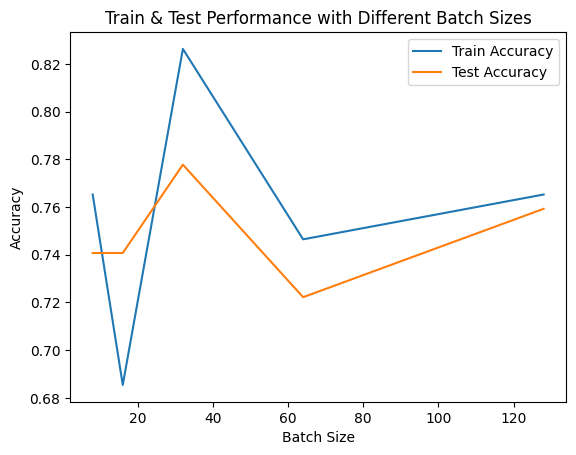

In [ ]:
# plot the results
plt.plot(batch_sizes, metrics_3_4["train_accuracy"],  linestyle='-', label='Train Accuracy')
plt.plot(batch_sizes, metrics_3_4["test_accuracy"], linestyle='-', label='Test Accuracy')

plt.title('Train & Test Performance with Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 5. Present the performance of logistic regression with at least three different learning rates.


In [ ]:
X = wine.drop('class', axis=1).values
y = wine['class'].values

np.random.seed(40)

# shuffle the indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# calculate the split point for 80/20 ratio
split_point = int(0.8 * len(X))

# Split the data
X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
y_train, y_test = y[indices[:split_point]], y[indices[split_point:]]

In [ ]:
# train and evaluate models with different learning rates
learning_rates = [0.1, 0.05, 0.02, 0.01, 0.002, 0.001, 0.0001, 0.00001]

learn_metrics_list = []

for i in range(len(learning_rates)):
    model = LogisticRegression(learning_rate=learning_rates[i])

    # train the model
    model.fit(X_train, y_train)

    # make predictions on both training and test sets
    learn_train_predictions = model.predict(X_train)
    learn_test_predictions = model.predict(X_test)

    # calculate metrics
    learn_train_metrics = calculate_metrics(y_train, learn_train_predictions)
    learn_test_metrics = calculate_metrics(y_test, learn_test_predictions)

    learn_metrics_list.append({
        'learning_rate': learning_rates[i],
        'train_accuracy': learn_train_metrics['accuracy'],
        'train_precision': learn_train_metrics['precision'],
        'train_recall': learn_train_metrics['recall'],
        'train_f1_score': learn_train_metrics['f1_score'],
        'test_accuracy': learn_test_metrics['accuracy'],
        'test_precision': learn_test_metrics['precision'],
        'test_recall': learn_test_metrics['recall'],
        'test_f1_score': learn_test_metrics['f1_score']})


metrics_3_5 = pd.DataFrame(learn_metrics_list)

In [ ]:
print(metrics_3_5)

   learning_rate  train_accuracy  train_precision  train_recall  \
0        0.10000        0.769953         0.458855      0.592954   
1        0.05000        0.779343         0.490878      0.604448   
2        0.02000        0.774648         0.493762      0.597201   
3        0.01000        0.699531         0.677603      0.602015   
4        0.00200        0.708920         0.685577      0.613509   
5        0.00100        0.704225         0.725490      0.610787   
6        0.00010        0.779343         0.485931      0.604448   
7        0.00001        0.788732         0.700533      0.638615   

   train_f1_score  test_accuracy  test_precision  test_recall  test_f1_score  
0        0.512095       0.740741        0.407407     0.564103       0.473118  
1        0.529927       0.759259        0.441270     0.589744       0.501401  
2        0.525989       0.759259        0.441270     0.589744       0.501401  
3        0.516420       0.740741        0.716959     0.617949       0.546389  
4

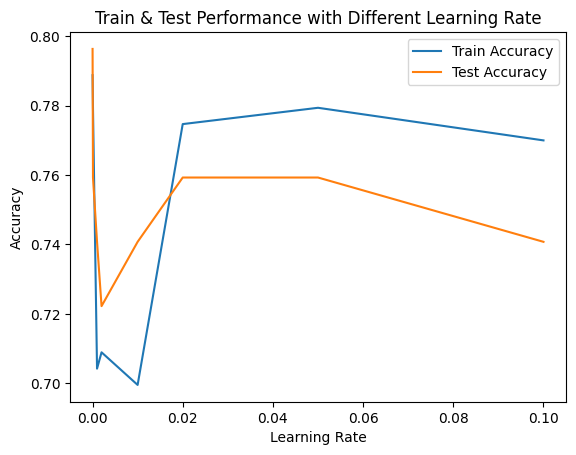

In [ ]:
# plot the results
plt.plot(learning_rates, metrics_3_5["train_accuracy"], linestyle='-', label='Train Accuracy')
plt.plot(learning_rates, metrics_3_5["test_accuracy"], linestyle='-', label='Test Accuracy')

plt.title('Train & Test Performance with Different Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 6. Given a variety of parameter configurations, select a performance metric and present the optimal parameter choice for each dataset. Please provide a rationale for your metric selection, along with an explanation of why you opted for that particular metric.

In [ ]:
X = wine.drop('class', axis=1).values
y = wine['class'].values

np.random.seed(40)

# shuffle the indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# calculate the split point for 80/20 ratio
split_point = int(0.8 * len(X))

# Split the data
X_train, X_test = X[indices[:split_point]], X[indices[split_point:]]
y_train, y_test = y[indices[:split_point]], y[indices[split_point:]]

In [ ]:
# create a new instance of the model for each batch size
mini_batch_log_reg = MiniBatchLogisticRegression(batch_size=32, learning_rate=0.001)

# train the model
mini_batch_log_reg.fit(X_train, y_train)

# make predictions on both training and test sets
y_train_prediction = mini_batch_log_reg.predict(X_train)
y_test_prediction = mini_batch_log_reg.predict(X_test)


In [ ]:
# calculate metrics for logistic regression
y_train_metrics = calculate_metrics(y_train, y_train_prediction)
y_test_metrics = calculate_metrics(y_test, y_test_prediction)


In [ ]:
y_train_metrics

{'accuracy': 0.7793427230046949,
 'precision': 0.4728132387706856,
 'recall': 0.6059470264867567,
 'f1_score': 0.52491601343785}

In [ ]:
y_test_metrics

{'accuracy': 0.7777777777777778,
 'precision': 0.4444444444444445,
 'recall': 0.6153846153846154,
 'f1_score': 0.5161290322580645}

Considering
1. **Noise regularization**:
A smaller batch size (e.g. 32) introduces more noise in the parameter updates during training. This noise can act as a form of regularization, preventing the model from fitting the training data too closely and improving generalization to unseen data.

2. **Learning rate sensitivity**: A learning rate of 0.001 may be appropriate for smaller batch sizes. Larger learning rates may lead to overshooting and cause the optimization process to diverge, while smaller learning rates may lead to slow convergence.


3. **Balance between stochastic and deterministic updates**: A batch size of 32 strikes a balance between small batches of random updates and large batches of more deterministic updates. This balance can help the model find a good compromise between exploration and exploitation during training.


I chose a mini-batch SGD with batch_size=32 and learning_rate=0.0001, and this seems to be the one that seems to work the best.

